# 如何学习使用matplotlib

可视化可以帮助人们对数据有更直观的认识，更容易获取有用的信息。

在python中，最基本的绘图库就是matplotlib了。安装matplotlib的方式：

```Shell
conda install -c conda-forge matplotlib
```

本文主要参考资料有：

- <https://towardsdatascience.com/data-visualization-using-matplotlib-16f1aae5ce70>
- <https://heartbeat.fritz.ai/introduction-to-matplotlib-data-visualization-in-python-d9143287ae39>
- [matplotlib-gallery](https://github.com/rasbt/matplotlib-gallery)
- [Creating publication-quality figures with Matplotlib](https://github.com/jbmouret/matplotlib_for_papers)

作为一个拥有很多api的库，如果对其基本思路没有认知，那每次使用的时候都要大量地查询官方文档，费时费力。

## 基本构图

对matplotlib，首先要了解其绘图的基本方式。即matplotlib是采用什么样的基本方式进行构图。

matplotlib是一个二维绘图库，其主要构件有两大部分：

- 构图区Figure：Figure是一个顶层容器，包含所有的figures和Axes。一个Figure的基本构成如下图所示，包括title/grid/line/markers/legend/Axes

![figure](figure-matplotlib.png)

- 坐标轴Axes：可以有多个坐标系（这样可以一次绘制多个图），每个坐标系都有x轴和y轴，每个轴都有相关的title/tick（刻度）/label。

![axes](axes-in-matplotlib.png)

## 绘图范式

安装matplotlib库很简单，通过pip或conda都很容易，这里不再赘述，导入方式如下代码所示。

In [1]:
import matplotlib.pyplot as plt
# 在jupyter中可以使用以下语句很容易地显示图形
%matplotlib inline
# 如果是python脚本环境下，则需要调用以下语句，当然在jupyter下也可以使用该语句
plt.show()

使用matplotlib绘图有两大类基本的方法。

### Functional Approach

此类方法直接使用基本的命令即可，遵循着很简洁的步骤：

1. 在matplotlib中最常用的就是pyplot模块。首先导入该模块；
2. 导入可视化对象。通常使用numpy或pandas库的读取数据功能来帮助实现，比如pd.readcsv()；
3. 从数据中提取需要展示的部分。这部分利用numpy或pandas库的函数可以较好实现；
4. 利用ply.plot()绘制图形；
5. 利用plt.xlabel、plt.ylabel和plt.xticks、plt.yticks等说明坐标轴的信息；
6. 利用plt.legend()、plt.title()等说明图的信息；
7. 最后使用plt.show()（jupyter下使用%matplotlib inline即可）将图形展示出来。

比如：


Text(0.5, 1.0, 'First Plot')

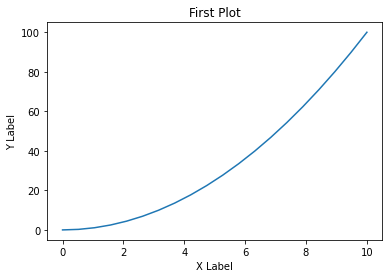

In [2]:
import numpy as np
x=np.linspace(0,10,20)
y=x**2
plt.plot(x,y)
plt.xlabel('X Label')
plt.ylabel('Y Label')
plt.title('First Plot')

如果需要多个Axes同时在一个Figure里。则可以使用subplot()方法来实现，

该方法包括三个主要参数：

- nrows：Figure的行数;
- ncols：Figure的列数;
- plot_number：在哪一个子Axe下面画图。

如下代码所示。


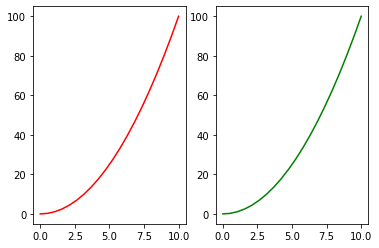

In [3]:
plt.subplot(1,2,1)
# 可以设置图形颜色
plt.plot(x,y,'red')

plt.subplot(1,2,2)
plt.plot(x,y,'green')

### Object oriented Interface

这一种是更好的绘图方式。其基本思路是创建Figure对象，并对其使用各类方法。

用此法绘图的一般思路前面导入数据部分和前述一致，不再赘述，其他部分:

1. 创建Figure对象；
2. 增加坐标轴：add_axes有4个参数，对应axes被放置的位置（**左（到左侧距离），底（到底侧距离），宽，高**），取值范围[0,1]；
3. 使用axes绘图并配置坐标与图。

代码如下所示。

Text(0.5, 1.0, 'Second Plot')

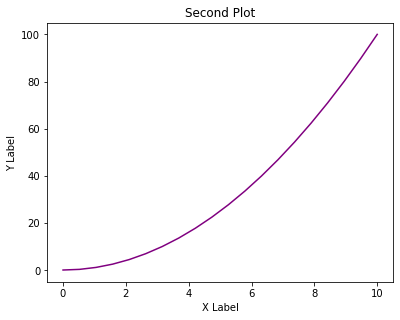

In [4]:
fig=plt.figure()
ax=fig.add_axes([0.1,0.2,0.8,0.9])
ax.plot(x,y,'purple')
ax.set_xlabel('X Label')
ax.set_ylabel('Y Label')
ax.set_title('Second Plot')

和直接绘图方式一样，在面向对象的方法中也可以一次绘制多个图，这种方式更加灵活


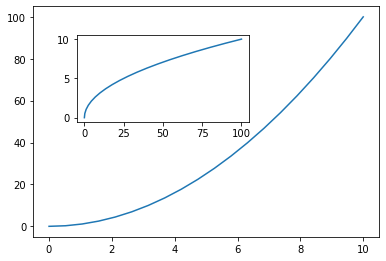

In [5]:
fig=plt.figure()
axes1=fig.add_axes([0.1,0.1,0.8,0.8])
axes2=fig.add_axes([0.2,0.5,0.4,0.3])
axes1.plot(x,y)
axes2.plot(y,x)

也可以使用subplot画图。但是不再是subplot()方法，而是subplots()方法。其只有两个方法，先绘制canvas。绘图的工作交给axes的函数来完成。

代码如下所示


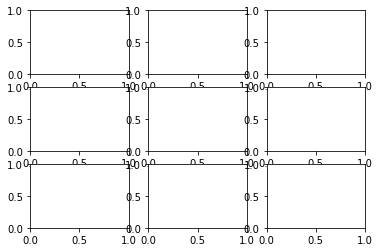

In [6]:
# 空canvas
fig, axes=plt.subplots(3,3)

如上图所示，坐标轴之间是有重叠的，不美观，可以使用tight_layout语句进行修正。


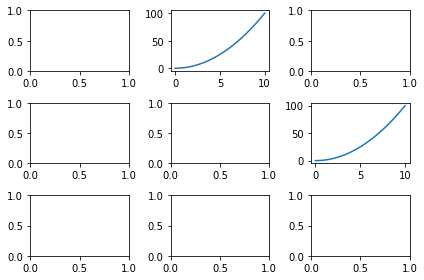

In [7]:
fig, ax=plt.subplots(3,3)
plt.tight_layout()
ax[0,1].plot(x,y)
ax[1,2].plot(x,y)

## 绘图细节

图形的定制是使用matplotlib时最大的问题，这里简单分析其基本的定制思路。

### Figure size, aspect ratio, DPI

使用figsize、dpi等参数可以对图形进行配置。figsize是图形宽和高（单位是英寸）组成的元组。dpi（dots-per-inch）是像素。

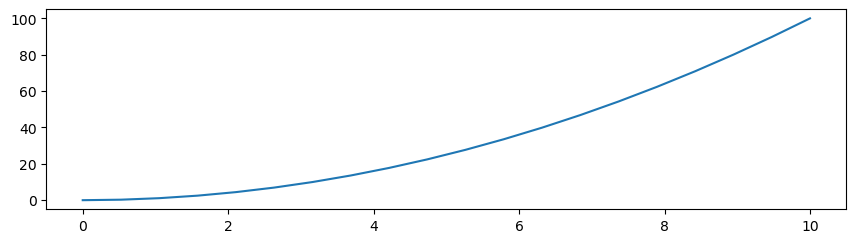

In [8]:
fig=plt.figure(figsize=(8,2),dpi=100)
ax=fig.add_axes([0,0,1,1])
ax.plot(x,y)

使用subplots：


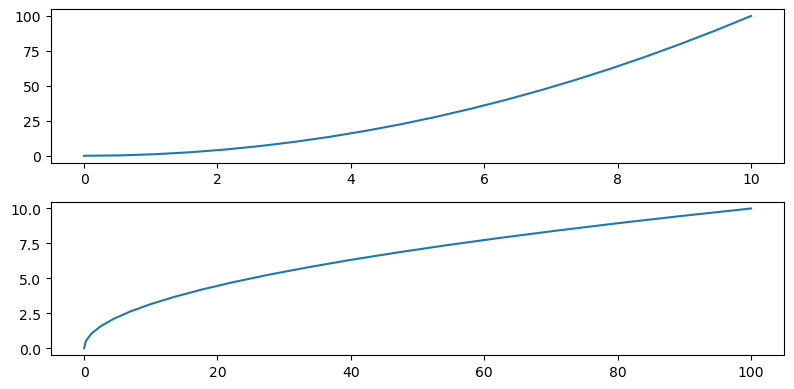

In [9]:
fig,ax=plt.subplots(nrows=2,ncols=1,figsize=(8,4),dpi=100)
ax[0].plot(x,y)
ax[1].plot(y,x)
plt.tight_layout()

### 图形读写

图像可以保存为各种类型的文件，比如png/svg/pdf等等。

注意保存前不要plt.show()，否则会保存空白，因为plt.show()之后会新建figure。这部分可以参考：[Matplotlib (pyplot) savefig outputs blank image](https://stackoverflow.com/questions/9012487/matplotlib-pyplot-savefig-outputs-blank-image)

如果保存的时候想要去除周围的白边，可以使用参数：bbox_inches="tight"，详见：[Matplotlib with annotation cut off from the saved figure](https://stackoverflow.com/questions/29901422/matplotlib-with-annotation-cut-off-from-the-saved-figure)

In [10]:
fig.savefig('my_figure.png')

读取图片并显示的方式：


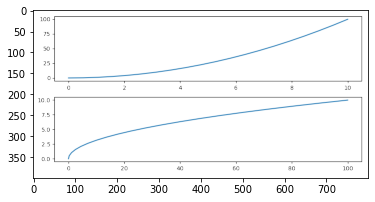

In [11]:
import matplotlib.image as mpimg
plt.imshow(mpimg.imread('my_figure.png'))

### 图例

利用图例可以很很容易区别绘制的图形。

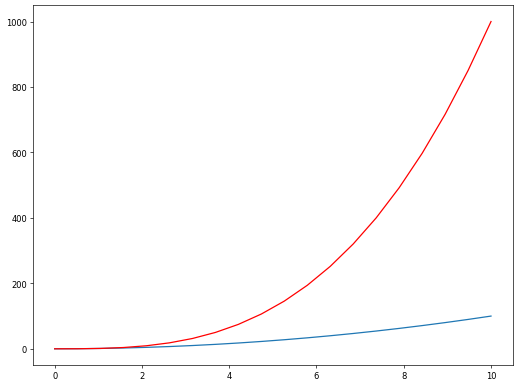

In [12]:
fig=plt.figure(figsize=(8,6),dpi=60)
ax=fig.add_axes([0,0,1,1])
ax.plot(x,x**2)
ax.plot(x,x**3,'red')

如上图所示，很难区分出两条线的实际数学意义。而使用下列代码即可。


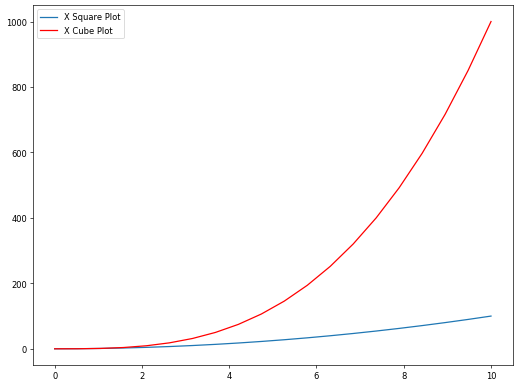

In [13]:
fig=plt.figure(figsize=(8,6),dpi=60)
ax=fig.add_axes([0,0,1,1])
ax.plot(x,x**2,label='X Square Plot')
ax.plot(x,x**3,'red',label='X Cube Plot')

ax.legend()

### Plot Appearance

关于图形的外观，包括marker的形式，线型等都是可以改变的。具体可查阅[官方文档](https://matplotlib.org/api/markers_api.html)，
[官方文档](https://matplotlib.org/2.0.1/api/lines_api.html)。这里简单展示一些示例。

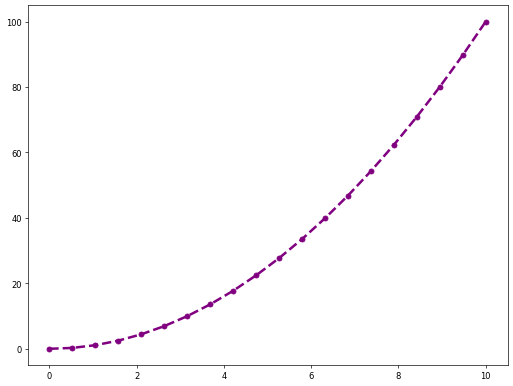

In [14]:
fig=plt.figure(figsize=(8,6),dpi=60)
ax=fig.add_axes([0,0,1,1])

ax.plot(x,y,color='purple',linewidth=3,linestyle='--',marker='o')

### Plot range

通过set_xlim和set_ylim可以限制图形显示的范围。

(0.0, 5.0)

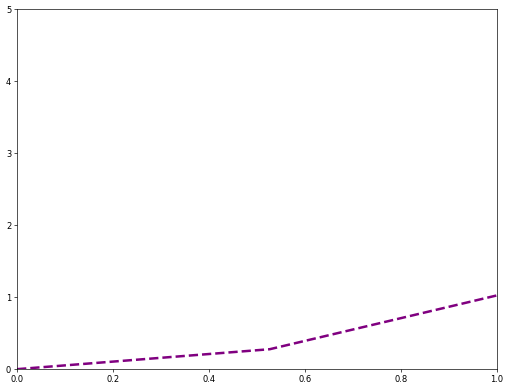

In [15]:
fig=plt.figure(figsize=(8,6),dpi=60)
ax=fig.add_axes([0,0,1,1])

ax.plot(x,y,color='purple',lw=3, ls='--')

ax.set_xlim([0,1])
ax.set_ylim([0,5])

### 字体

有时候需要改变显示字体以满足特定需要，这时候可以修改字体如下：

(0.0, 5.0)

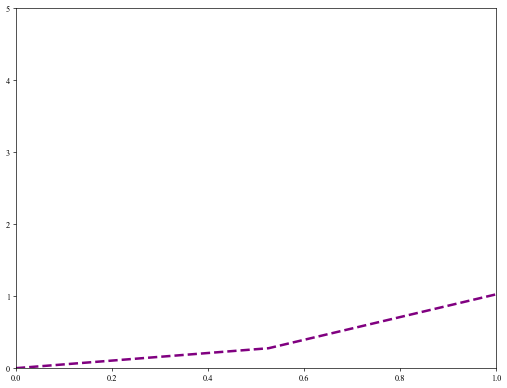

In [16]:
import matplotlib.pyplot as plt
import numpy as np

fig=plt.figure(figsize=(8,6),dpi=60)
# 设置字体格式
plt.rcParams['font.family'] = 'serif'
plt.rcParams['font.serif'] = ['Times New Roman'] + plt.rcParams['font.serif']

ax=fig.add_axes([0,0,1,1])
x=np.linspace(0,10,20)
y=x**2
ax.plot(x,y,color='purple',lw=3, ls='--')

ax.set_xlim([0,1])
ax.set_ylim([0,5])

## 绘图类型实例

了解基本构图法之后，再简单介绍各类图形。

### 直方图(Histogram)

一个Histogram把数据分为若干类，然后每一类里的数据进行计数。当需要对变量进行计数时，使用这种图。

直方图返回对象包括：每个bin的频次，每个bin代表的范围的中值，代表每个bar的矩形的Patch对象。

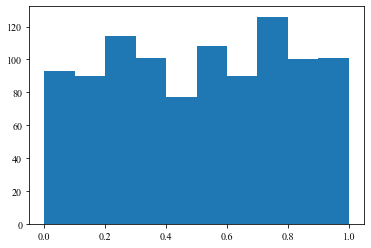

In [17]:
import numpy as np
import matplotlib.pyplot as plt

x=np.random.rand(1000)
# If bins is an integer, it defines the number of equal-width bins in the range.
n,bins,patches=plt.hist(x,bins=10)

尝试把直方图画到别的图旁边

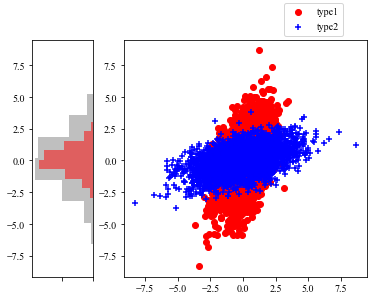

In [18]:
import numpy as np
import matplotlib.pyplot as plt

mean = [0,0]
cov = [[1,1],[1,4]]
x,y=np.random.multivariate_normal(mean,cov,3000).T
fig = plt.figure(figsize=(6,6))
grid = plt.GridSpec(4,4,wspace=0.5,hspace=0.5)

main_ax=plt.subplot(grid[0:3,1:4])
# plt.plot(x,y,'ok',markersize=3,alpha=0.2)
# plt.scatter(x,y,c=y,cmap="Reds",marker="o")
# plt.scatter(y,x,c=x,cmap="Blues",marker="+")
# 注意如果需要图例，需要制定好label
main_ax.scatter(x,y,c="red",label="type1",marker="o")
main_ax.scatter(y,x,c="blue",label="type2",marker="+")
# 只在scatter的ax里面给出图例
# main_ax.legend()
y_hist = plt.subplot(grid[0:3,0],xticklabels=[],sharey=main_ax)
plt.hist(y,orientation='horizontal',color='gray', alpha=0.5)
plt.hist(x,orientation='horizontal',color='red', alpha=0.5)
y_hist.invert_xaxis()

# 在整个fig里面做legend
handles, labels = main_ax.get_legend_handles_labels()
# 可以选择的图例位置：best, upper right, upper left, lower left, lower right,right,center left,center right,lower center,upper center,	center
# fig.legend(handles, labels, loc='lower left')
# 具体位置
x_value = .14    #Offset by eye
y_value = .55
axbox = main_ax.get_position()
fig.legend(handles, labels,loc = (axbox.x1 - x_value, axbox.y1))

如果要指定legend的具体位置，可以参考：[Matplotlib: Adjust legend location/position](https://stackoverflow.com/questions/24061296/matplotlib-adjust-legend-location-position), [How to specify legend position in matplotlib in graph coordinates](https://stackoverflow.com/questions/44413020/how-to-specify-legend-position-in-matplotlib-in-graph-coordinates), [What does a 4-element tuple argument for 'bbox_to_anchor' mean in matplotlib?](https://stackoverflow.com/questions/39803385/what-does-a-4-element-tuple-argument-for-bbox-to-anchor-mean-in-matplotlib)

### 散点图

scatter plot 主要是要注意 marker 的配置. 还有就是colormap的配套使用。这部分除了参考官方文档，还参考了：[How to modify the colormap of a scatter plot after it was drawn](https://stackoverflow.com/questions/53848655/how-to-modify-the-colormap-of-a-scatter-plot-after-it-was-drawn)

((-1.5, 1.5), ([], []))

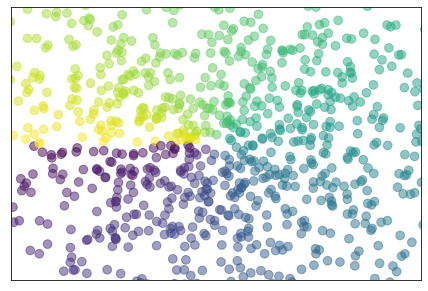

In [19]:
import numpy as np
import matplotlib.pyplot as plt

n = 1024
X = np.random.normal(0,1,n)
Y = np.random.normal(0,1,n)
T = np.arctan2(Y,X)
plt.axes([0.025,0.025,0.95,0.95])
# X和Y是表示点坐标的，T是值，s是marker的size，c是marker的颜色，不同对应的是不同大小的值，alpha是透明度
plt.scatter(X,Y, s=75, c=T, alpha=.5)
# 设置坐标轴
plt.xlim(-1.5,1.5), plt.xticks([])
plt.ylim(-1.5,1.5), plt.yticks([])
# savefig('../figures/scatter_ex.png',dpi=48)

使用colormap时，使用plt.colorbar()可以很简单做出图，但是如果使用ax.colorbar()，就必须要为ax指定一个ScalarMappable

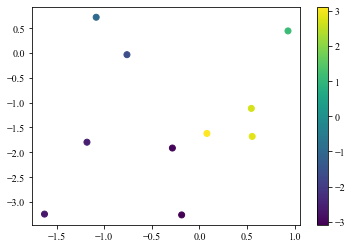

In [20]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as colors
import matplotlib.cbook as cbook

N = 10
X = np.random.normal(-1,1,N)
Y = np.random.normal(-1,1,N)
# Z = np.arctan2(Y,X)
Z = np.arctan2(X,Y)

plt.scatter(X, Y, c=Z, cmap='viridis')
plt.colorbar()
plt.show()

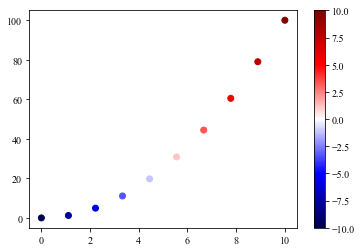

In [21]:
import matplotlib
x = np.linspace(0,10,10)
y = x**2
c = np.linspace(-10,10,10)
cmap = "seismic"
norm = matplotlib.colors.Normalize(vmin=min(c),vmax=max(c))

fig, ax = plt.subplots()

scat = plt.scatter(x,y,c=c,cmap=cmap,norm=norm)
plt.colorbar()

如果使用ax来控制colormap，那么就需要增加ScalarMappable，并且还得单独设置图例范围，否则就会出现如下图的情况，默认[0,1]，因此，最好还是采用上面的办法来绘制colormap

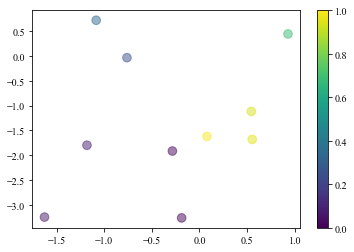

In [22]:
fig, ax = plt.subplots()
scat = ax.scatter(X,Y, s=75, c=Z, alpha=.5)
# 必须要设置一个ScalarMappable，否则会报错
sm = plt.cm.ScalarMappable()
plt.colorbar(sm, ax=ax)

如果想要绘制出scatter plot中点的回归线，可以使用下面的方式：

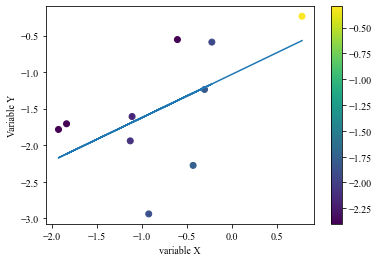

In [23]:
import numpy as np
from numpy.polynomial.polynomial import polyfit
import matplotlib.pyplot as plt
import matplotlib.colors as colors
import matplotlib.cbook as cbook

N = 10
X = np.random.normal(-1,1,N)
Y = np.random.normal(-1,1,N)
Z = np.arctan2(Y,X)
# Fit with polyfit
b, m = polyfit(X, Y, 1)

plt.scatter(X, Y, c=Z, cmap='viridis')
plt.plot(X, b + m * X, '-')
plt.colorbar()
# 如果要设置坐标轴
plt.xlabel('variable X')
plt.ylabel('Variable Y')
plt.show()

在一个scatter中绘制两种marker表示的散点图：

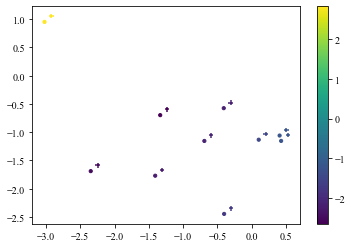

In [24]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as colors
import matplotlib.cbook as cbook

N = 10
X = np.random.normal(-1,1,N)
Y = np.random.normal(-1,1,N)
Z1 = np.arctan2(Y,X)
Z2 = np.arctan2(Y,X)

scat = plt.scatter(X, Y, c=Z1, cmap='viridis', marker='o',s=10)
plt.scatter(X+0.1, Y+0.1, c=Z2, cmap='viridis', marker='+',s=20)
plt.colorbar()
plt.show()

散点图和右边的colorbar有时候会出现对不齐的情况，这个时候，需要重新把colorbar定位到图的范围里面，可以参考：[Set Matplotlib colorbar size to match graph](https://stackoverflow.com/questions/18195758/set-matplotlib-colorbar-size-to-match-graph)。

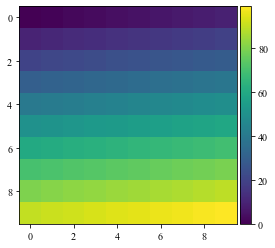

In [25]:
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import make_axes_locatable
import numpy as np

plt.figure()
ax = plt.gca()
im = ax.imshow(np.arange(100).reshape((10,10)))

# create an axes on the right side of ax. The width of cax will be 5%
# of ax and the padding between cax and ax will be fixed at 0.05 inch.
divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="5%", pad=0.05)

plt.colorbar(im, cax=cax)

当绘制离散值，比如只有两个值，在scatter图中用不同颜色绘出表达不同的点。这里有不同的画法，第一种如下所示，即每次画一组，每次都只用指定点的x和y坐标，不需要再给值。用plt.scatter或者ax.plot都可以绘制，这里暂时给的是ax的例子

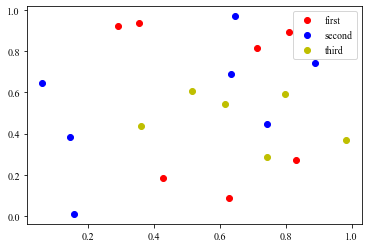

In [26]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
np.random.seed(1974)

# Generate Data
num = 20
x, y = np.random.random((2, num))
labels = np.random.choice(['a', 'b', 'c'], num)
colors = ["r","b","y"]
names = ["first","second","third"]
df = pd.DataFrame(dict(x=x, y=y, label=labels))

groups = df.groupby('label')

# Plot
fig, ax = plt.subplots()
ax.margins(0.05) # Optional, just adds 5% padding to the autoscaling
idx = 0
for name, group in groups:
    # linestyle 是点上面带的线    
    ax.plot(group.x, group.y, marker='o', linestyle='', ms=6, label=names[idx],c=colors[idx])
    idx = idx + 1
ax.legend()

plt.show()

第二种是利用c给每个点指定颜色，一次性绘出所有的点。下面还给出了定制的legend。

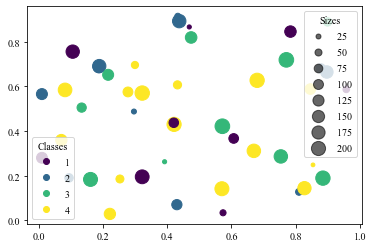

In [27]:
N = 45
x, y = np.random.rand(2, N)
c = np.random.randint(1, 5, size=N)
s = np.random.randint(10, 220, size=N)

fig, ax = plt.subplots()

scatter = ax.scatter(x, y, c=c, s=s)

# produce a legend with the unique colors from the scatter
legend1 = ax.legend(*scatter.legend_elements(),
                    loc="lower left", title="Classes")
ax.add_artist(legend1)

# produce a legend with a cross section of sizes from the scatter
handles, labels = scatter.legend_elements(prop="sizes", alpha=0.6)
legend2 = ax.legend(handles, labels, loc="upper right", title="Sizes")

plt.show()

### 序列曲线图

如果只单纯做序列图，在pandas中直接利用Dataframe作图是比较简单的做法，可以自行查询。

这里记录如何使用matplotlib作图。也十分简单，直接使用plot即可。

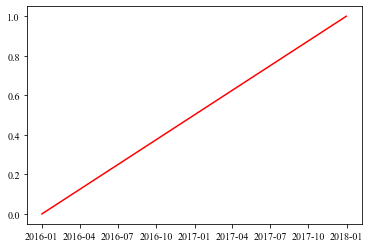

In [28]:
import matplotlib.pyplot as plt
import matplotlib.dates
from datetime import datetime

t = [datetime(2016,1,1), datetime(2017,12,31)]
x = [0,1]

fig, ax = plt.subplots()
ax.plot(t,x, color='r')
plt.show()

当多个序列一起画时，依次绘出即可，下面记录一些细节设置，这些设置主要在StackOverflow上面查的，还有一些参考如下：

- [How to Set Tick Labels Font Size in Matplotlib](https://www.delftstack.com/howto/matplotlib/how-to-set-tick-labels-font-size-in-matplotlib/#:~:text=of%20tick%20labels.-,ax.,the%20tick%20labels%20font%20size.)
- [Changes to the default style](https://matplotlib.org/3.2.2/users/dflt_style_changes.html)
- [How to change the font size on a matplotlib plot](https://stackoverflow.com/questions/3899980/how-to-change-the-font-size-on-a-matplotlib-plot)

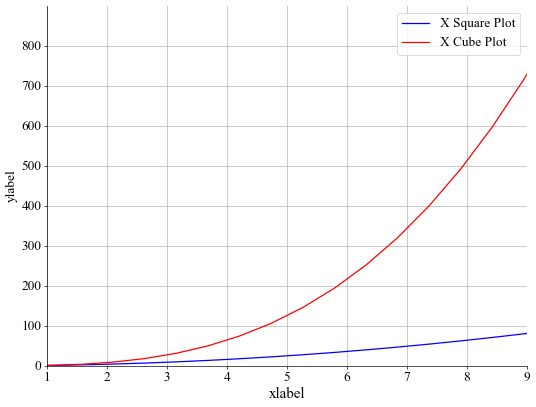

In [29]:
import matplotlib.pyplot as plt
import numpy as np

fig=plt.figure(figsize=(8,6),dpi=60)
ax=fig.add_axes([0,0,1,1])
x=np.linspace(0,10,20)
y=[x**2, x**3]
labels = ['X Square Plot','X Cube Plot']
# 设置每条线的颜色
for i, color in enumerate(['blue','red']):
    plt.plot(x, y[i], color=color, label=labels[i])
# ax.plot(x,y[i],label='X Square Plot')
# ax.plot(x,x**3,'red',label='X Cube Plot')

ax.legend()
# xlable 和 ylabel 
plt.xlabel('xlabel', fontsize=18)
plt.ylabel('ylabel', fontsize=16)
# set limit of x and y
ax.set_xlim(1, 9)
ax.set_ylim(1, 900)

# set x y number font size
# 全局设置可以使用plt.rc，不过还是推荐局部的直接在ax上设置
# plt.rc('xtick',labelsize=20)
# plt.rc('ytick',labelsize=20)
# 局部设置轴上字体，还可以设置 interval
plt.xticks(np.arange(1, 10, 1), fontsize=16)
plt.yticks(np.arange(0, 900, 100), fontsize=16)
# set legend font size
plt.legend(prop={'size': 16})
# plot the grid of the figure
plt.grid()
# Hide the right and top spines
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

基于上面的例子，给一个更多条线的例子，其中两个线是实线，两个线是虚线，一个实线和一个虚线是一个颜色，另外是另一个颜色，最后再多一条不同的线。

这是一个稍微复杂一些的例子，对不同类型的数据采用不同类型的线条绘制，绘制线并没有难点，一条条画出来即可，关键是图例。

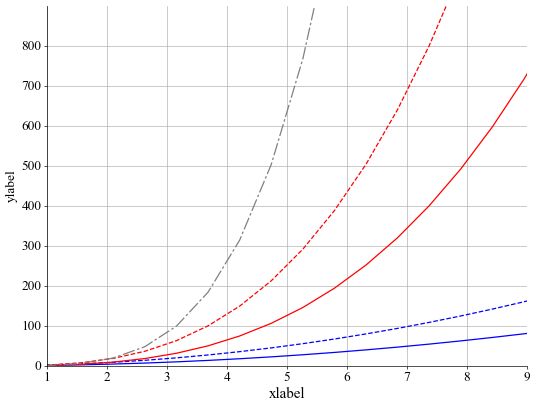

In [30]:
import matplotlib.pyplot as plt
import numpy as np

# 和上面例子一样的基本设置
fig=plt.figure(figsize=(8,6),dpi=60)
ax=fig.add_axes([0,0,1,1]) 
plt.xlabel('xlabel', fontsize=18)
plt.ylabel('ylabel', fontsize=16)
ax.set_xlim(1, 9)
ax.set_ylim(1, 900)
plt.xticks(np.arange(1, 10, 1), fontsize=16)
plt.yticks(np.arange(0, 900, 100), fontsize=16)
plt.grid()
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

# 绘制多条线
x=np.linspace(0,10,20)
y=[x**2, 2*x**2, x**3, 2*x**3, x**4]
# 设置每条线的形式
for i, color in enumerate(['blue','red']):
    for j, linestyle in enumerate(['-','--']):
        plt.plot(x, y[i*2+j], color=color, ls=linestyle)
# 最后一个线更加特殊一些
line_i, = ax.plot(x, y[4], color="grey")
line_i.set_dashes([2, 2, 10, 2])

下面是对图例的处理，因为有三类图，所以需要三个图例，一个反映线型，一个反映颜色，还有最后一个针对上面灰色的线。

多图例有几种比较典型的处理方式，

一个是直接画多个图例，可以参考：[matplotlib: 2 different legends on same graph](https://stackoverflow.com/questions/12761806/matplotlib-2-different-legends-on-same-graph)

另一个是一个图例框下面有不同的标题区分开不同的图例，可以参考：[Matplotlib - add titles to the legend rows](https://stackoverflow.com/questions/44071525/matplotlib-add-titles-to-the-legend-rows)

这里还是暂时用最简单的，每条线一个说明，其他的后续补充。

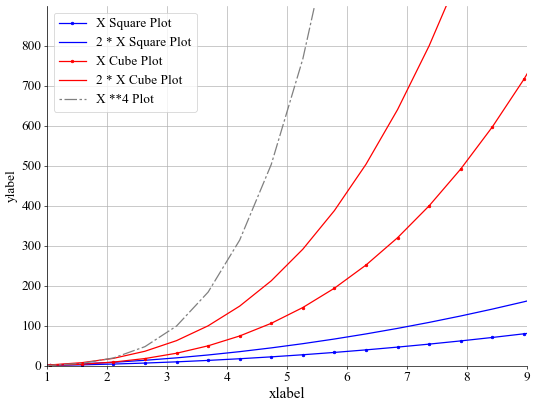

In [31]:
import matplotlib.pyplot as plt
import numpy as np

fig=plt.figure(figsize=(8,6),dpi=60)
ax=fig.add_axes([0,0,1,1]) 
plt.xlabel('xlabel', fontsize=18)
plt.ylabel('ylabel', fontsize=16)
ax.set_xlim(1, 9)
ax.set_ylim(1, 900)
plt.xticks(np.arange(1, 10, 1), fontsize=16)
plt.yticks(np.arange(0, 900, 100), fontsize=16)
plt.grid()
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

# 加label以给出图例
labels=['X Square Plot','2 * X Square Plot','X Cube Plot','2 * X Cube Plot',"X **4 Plot"]
x=np.linspace(0,10,20)
y=[x**2, 2*x**2, x**3, 2*x**3, x**4]
for i, color in enumerate(['blue','red']):
    # marker 的类型可以参考：https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.plot.html    
    for j, marker in enumerate(['.','']):
        plt.plot(x, y[i*2+j], color=color, marker=marker, label=labels[i*2+j])
line_i, = ax.plot(x, y[4], color="grey", label=labels[4])
line_i.set_dashes([2, 2, 10, 2])

# 绘制图例
ax.legend()
plt.legend(prop={'size': 16})

### 点击事件

本小节主要参考了官方文档[Event handling and picking](https://matplotlib.org/users/event_handling.html)。

事件是通过回调函数来实现的，形如下：

```python
fig, ax = plt.subplots()
ax.plot(np.random.rand(10))

def onclick(event):
    print('%s click: button=%d, x=%d, y=%d, xdata=%f, ydata=%f' %
          ('double' if event.dblclick else 'single', event.button,
           event.x, event.y, event.xdata, event.ydata))

cid = fig.canvas.mpl_connect('button_press_event', onclick)
```

mpl_connect函数会返回一个链接id，可以使用fig.canvas.mpl_disconnect(cid)释放。

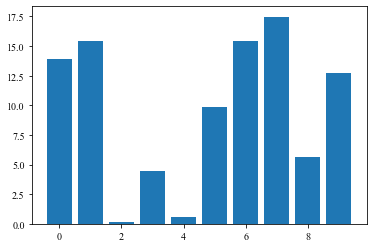

In [32]:
import numpy as np
import matplotlib.pyplot as plt

class DraggableRectangle:
    def __init__(self, rect):
        self.rect = rect
        self.press = None

    def connect(self):
        'connect to all the events we need'
        self.cidpress = self.rect.figure.canvas.mpl_connect(
            'button_press_event', self.on_press)
        self.cidrelease = self.rect.figure.canvas.mpl_connect(
            'button_release_event', self.on_release)
        self.cidmotion = self.rect.figure.canvas.mpl_connect(
            'motion_notify_event', self.on_motion)

    def on_press(self, event):
        'on button press we will see if the mouse is over us and store some data'
        if event.inaxes != self.rect.axes: return

        contains, attrd = self.rect.contains(event)
        if not contains: return
        print('event contains', self.rect.xy)
        x0, y0 = self.rect.xy
        self.press = x0, y0, event.xdata, event.ydata

    def on_motion(self, event):
        'on motion we will move the rect if the mouse is over us'
        if self.press is None: return
        if event.inaxes != self.rect.axes: return
        x0, y0, xpress, ypress = self.press
        dx = event.xdata - xpress
        dy = event.ydata - ypress
        #print('x0=%f, xpress=%f, event.xdata=%f, dx=%f, x0+dx=%f' %
        #      (x0, xpress, event.xdata, dx, x0+dx))
        self.rect.set_x(x0+dx)
        self.rect.set_y(y0+dy)

        self.rect.figure.canvas.draw()


    def on_release(self, event):
        'on release we reset the press data'
        self.press = None
        self.rect.figure.canvas.draw()

    def disconnect(self):
        'disconnect all the stored connection ids'
        self.rect.figure.canvas.mpl_disconnect(self.cidpress)
        self.rect.figure.canvas.mpl_disconnect(self.cidrelease)
        self.rect.figure.canvas.mpl_disconnect(self.cidmotion)

fig = plt.figure()
ax = fig.add_subplot(111)
rects = ax.bar(range(10), 20*np.random.rand(10))
drs = []
for rect in rects:
    dr = DraggableRectangle(rect)
    dr.connect()
    drs.append(dr)

plt.show()

### 绘制多图

多图绘制相对来说没那么容易，因为相比于单图，需要兼顾更多内容。前面在记录面向过程/面向对象方式的时候已经提到了subplot和subplots两种方式，另外还有别的常用方式，比如直接定义坐标位置，或者使用GridSpec等，这里补充记录，并将它们串起来帮助记忆。主要参考了：[python如何调整子图的大小？](https://www.zhihu.com/question/21953954)

不论哪种方式，子图的绘制归根到底都是在一个较大的图形中，放置一组较小的坐标轴。对于一般化的子图布局，一个典型的方式如下所示。

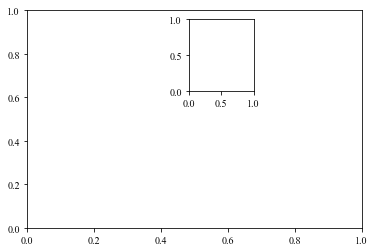

In [33]:
import numpy as np
import matplotlib.pyplot as plt

ax1=plt.axes()
ax2=plt.axes([0.5,0.6,0.15,0.25])

axes参数非常多，上面给出的是position参数，根据官方文档：https://matplotlib.org/api/_as_gen/matplotlib.pyplot.axes.html#examples-using-matplotlib-pyplot-axes

其含义是[left, bottom, width, height]，即左，底，宽，高，分别表示起始位置的左下角坐标，和axe的宽与高。坐标，尺寸数字应是相对值，具体可以尝试看看。

然后就可以在子图中绘图了。每生成一个子图坐标系时，plot函数都是在当前的子图上绘图。

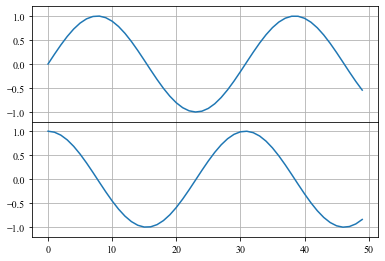

In [34]:
import numpy as np
import matplotlib.pyplot as plt

x=np.linspace(0,10)
plt.axes([0.1,0.5,0.8,0.4],ylim=(-1.2,1.2))
plt.grid(True)
plt.plot(np.sin(x))

plt.axes([0.1,0.1,0.8,0.4],ylim=(-1.2,1.2))
plt.grid(True)
plt.plot(np.cos(x))

这里给出的是一种最基本的绘制多图的方式，即直接定义子坐标轴位置并绘图。前面提到的subplot方法可以更快速地创建子图，不过只能创建彼此对齐地行列网格子图。

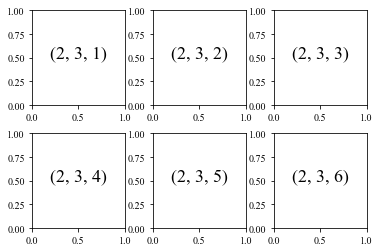

In [35]:
import numpy as np
import matplotlib.pyplot as plt

plt.subplots_adjust(hspace=0.3, wspace=0.3)
for i in range(1,7):
    plt.subplot(2,3,i)
    plt.text(0.5,0.5,str((2,3,i)),fontsize=18,ha="center")

subplots_adjust方法设置了子图之间地纵横方向上的间隙。如下所示可以看到间距变大，变小之后的效果。如果绘图用的是plt.subplots()函数，调整间距的时候需要将subplots_adjust放置到subplots函数之后（后面有例子）。

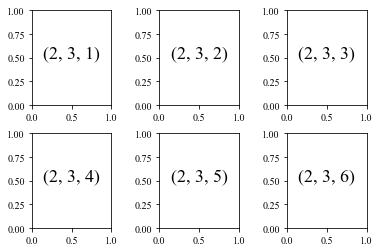

In [36]:
plt.subplots_adjust(hspace=0.3, wspace=0.6)
for i in range(1,7):
    plt.subplot(2,3,i)
    plt.text(0.5,0.5,str((2,3,i)),fontsize=18,ha="center")

图中的数字表示的是子图编号的规则，注意这里编号是从1开始的。如果想要设置坐标轴，让图共享坐标轴，可以：

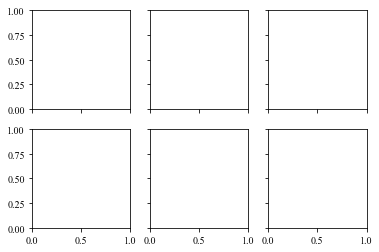

In [37]:
import numpy as np
import matplotlib.pyplot as plt

fig, ax=plt.subplots(2,3,sharex='col',sharey='row')

这里给出的subplots的使用，各个子图可以通过索引获取，然后在其上绘图：

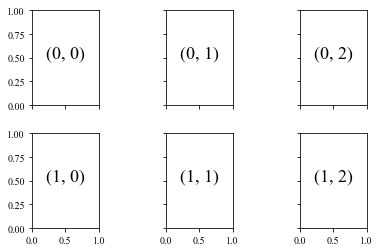

In [38]:
import numpy as np
import matplotlib.pyplot as plt
fig, ax=plt.subplots(2,3,sharex='col',sharey='row')
# 如果要调整间距，需要将subplots_adjust放置到subplots之后
plt.subplots_adjust(hspace=0.3, wspace=1)
for i in range(2):
    for j in range(3):
        ax[i,j].text(0.5,0.5,str((i,j)),fontsize=18,ha='center')

另外，如果想要给图设置title，对所有图形总的title，可以通过fig.suptitle()设置。

Text(0.5, 0.98, 'Title centered above all subplots')

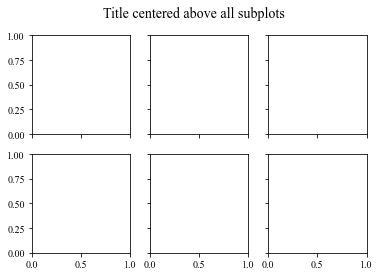

In [39]:
import matplotlib.pyplot as plt
fig, ax=plt.subplots(2,3,sharex='col',sharey='row')
fig.suptitle("Title centered above all subplots", fontsize=14)

如果要实现不规则的多行多列子图，可以使用GridSpec。

<AxesSubplot:>

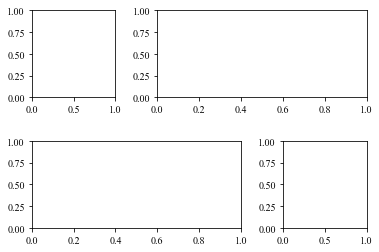

In [40]:
import numpy as np
import matplotlib.pyplot as plt

grid=plt.GridSpec(2,3,wspace=0.5, hspace=0.5)
plt.subplot(grid[0,0])
plt.subplot(grid[0,1:3])
plt.subplot(grid[1,0:2])
plt.subplot(grid[1,2])

可以看到，总共的区域是2乘3的，第一个子图是占据了左上角的一个网格，第二个占据了第一行两列网格。其他同理。再试一个布局：

<AxesSubplot:>

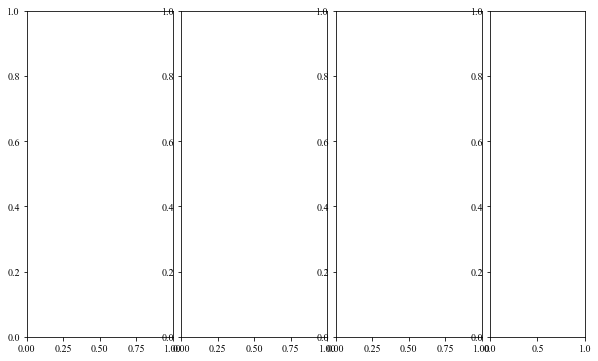

In [41]:
import numpy as np
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(10, 6))
grid=plt.GridSpec(1,11)
plt.subplot(grid[0:3])
plt.subplot(grid[3:6])
plt.subplot(grid[6:9])
plt.subplot(grid[9:11])

最后补充更多的实例。这里主要参考了：[How can I plot multiple figure in the same line with matplotlib?](https://stackoverflow.com/questions/34291260/how-can-i-plot-multiple-figure-in-the-same-line-with-matplotlib) 等

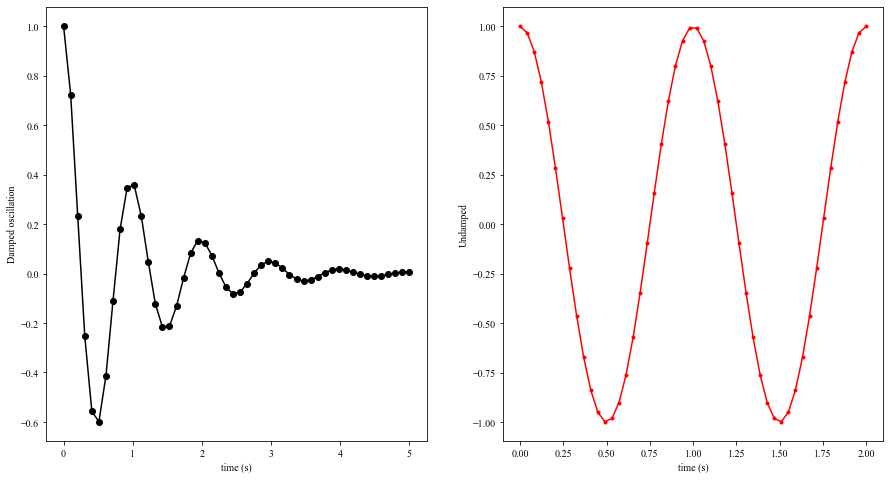

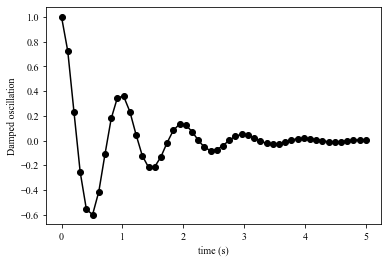

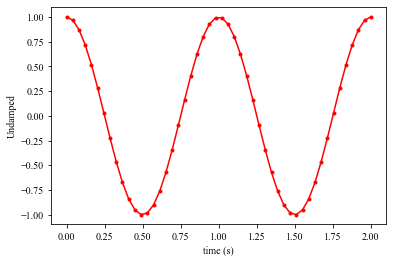

In [42]:
import numpy as np
def custom_plot1(ax = None):
    if ax is None:
        fig, ax = plt.subplots()
    x1 = np.linspace(0.0, 5.0)
    y1 = np.cos(2 * np.pi * x1) * np.exp(-x1)
    ax.plot(x1, y1, 'ko-')
    ax.set_xlabel('time (s)')
    ax.set_ylabel('Damped oscillation')

def custom_plot2(ax = None):
    if ax is None:
        fig, ax = plt.subplots()
    x2 = np.linspace(0.0, 2.0)
    y2 = np.cos(2 * np.pi * x2)
    ax.plot(x2, y2, 'r.-')
    ax.set_xlabel('time (s)')
    ax.set_ylabel('Undamped')

# 1. Plot in same line, this would work
fig = plt.figure(figsize = (15,8))
ax1 = fig.add_subplot(1,2,1)
custom_plot1(ax1)
ax2 = fig.add_subplot(1,2,2)
custom_plot2(ax2)

# 2. Plot in different line, default option
custom_plot1()
custom_plot2()

下面补充一个画多个直方图的例子。

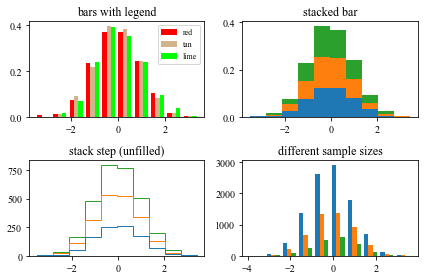

In [43]:
import numpy as np
import matplotlib.pyplot as plt

n_bins = 10
x = np.random.randn(1000, 3)

fig, axes = plt.subplots(nrows=2, ncols=2)    #subplots创建多个子图
ax0=axes[0,0]
ax1=axes[0,1]
ax2=axes[1,0]
ax3=axes[1,1]

colors = ['red', 'tan', 'lime']
ax0.hist(x, n_bins, density=True, histtype='bar', color=colors, label=colors)
ax0.legend(prop={'size': 8})
ax0.set_title('bars with legend')

ax1.hist(x, n_bins, density=True, histtype='bar', stacked=True)
ax1.set_title('stacked bar')

ax2.hist(x, n_bins, histtype='step', stacked=True)
ax2.set_title('stack step (unfilled)')

x_multi = [np.random.randn(n) for n in [10000, 5000, 2000]]
ax3.hist(x_multi, n_bins, histtype='bar')
ax3.set_title('different sample sizes')

fig.tight_layout()   #自动调整子图参数
plt.show()